**Credit Card Eligibility Prediction**

**Objective**

This dataset contains variables to understand factors influencing credit card eligibility. Each row represents an individual, identified by a unique ID, with attributes covering demographic, financial, and personal details.

Target Variable (y) : 
* Credit card eligibility (Yes/No or 1/0).

Features(x):

1. ID: Unique identifier for each individual.

2. Gender: Individual's gender.

3. Own_car: Binary, indicates car ownership.

4. Own_property: Binary, indicates property ownership.

5. Work_phone: Binary, indicates if the individual has a work phone.

6. Phone: Binary, indicates if the individual has a phone.

7. Email: Binary, indicates if an email address is provided.

8. Unemployed: Binary, indicates unemployment status.

9. Num_children: Number of children.

10. Num_family: Total family members.

11. Account_length: Duration of the individual's bank account.

12. Total_income: Individual's total income.

13. Age: Age of the individual.

14. Years_employed: Employment duration in years.

15. Income_type: Type of income (e.g., employed, self-employed).

16. Education_type: Education level.

17. Family_status: Family status.

18. Housing_type: Type of housing.

19. Occupation_type: Occupation type.



**Data Source**

/kaggle/input/credit-card-eligibility-data-determining-factors/dataset.csv

**Import Library**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import DataSet**

In [3]:
df = pd.read_csv("/kaggle/input/credit-card-eligibility-data-determining-factors/dataset.csv")


**Describe Data**

In [4]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [7]:
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [8]:
df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target'],
      dtype='object')

**Data Visualization**

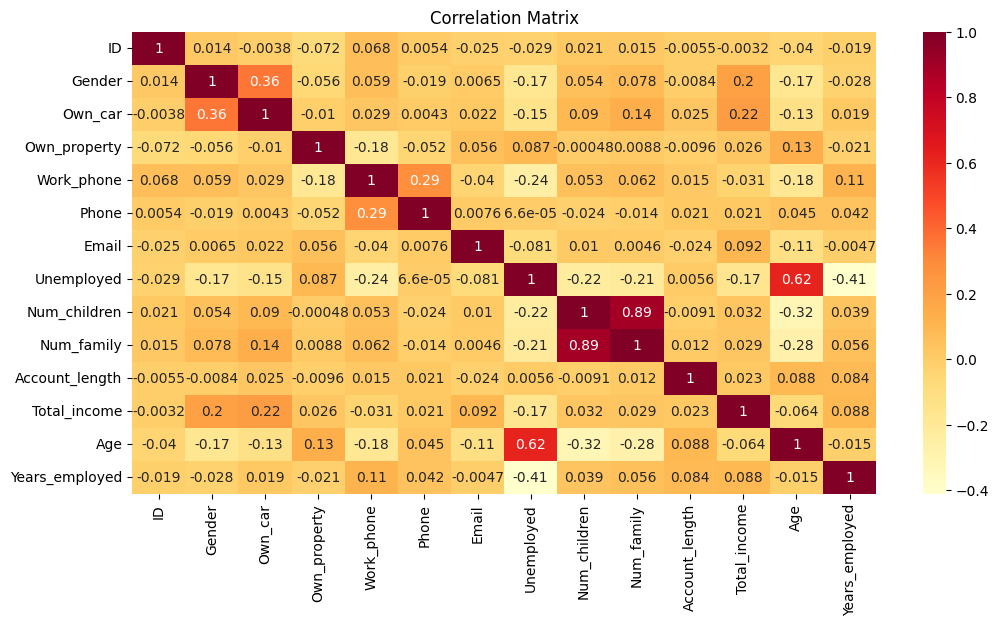

In [38]:
df1=df[['ID','Gender','Own_car','Own_property','Work_phone','Phone','Email','Unemployed','Num_children','Num_family','Account_length','Total_income','Age','Years_employed']]
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()


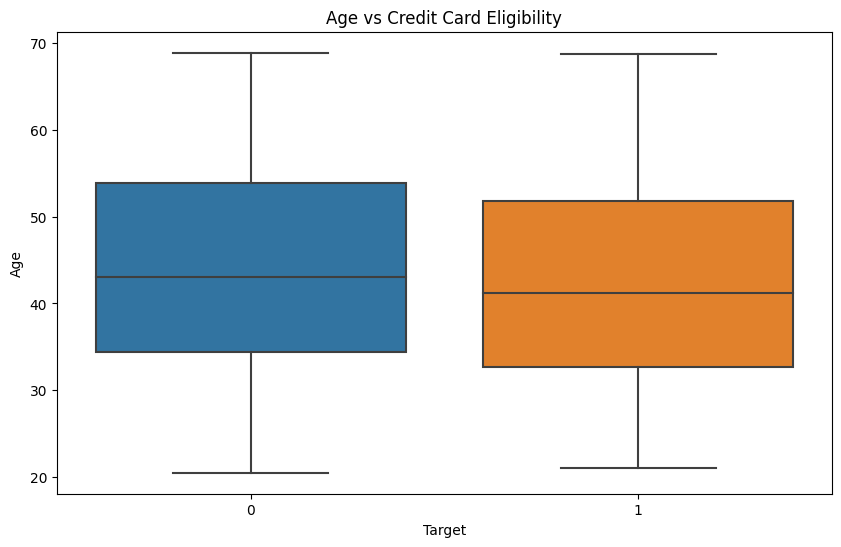

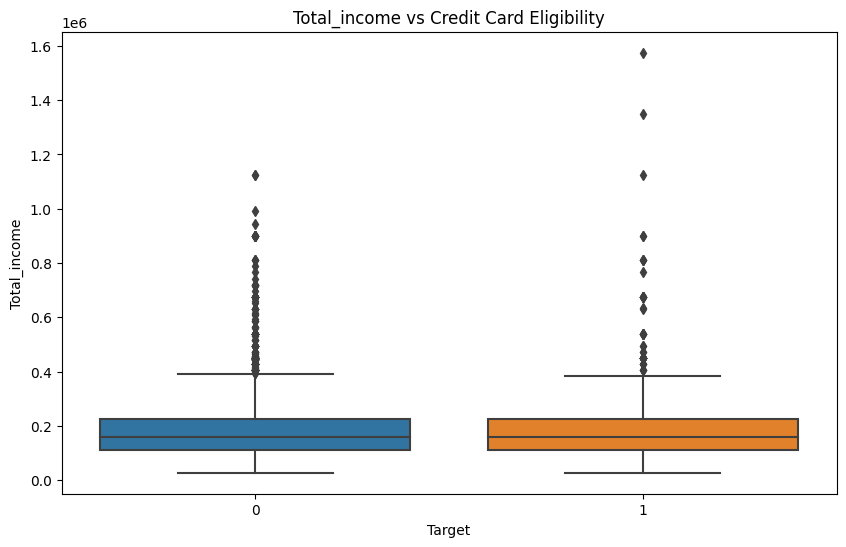

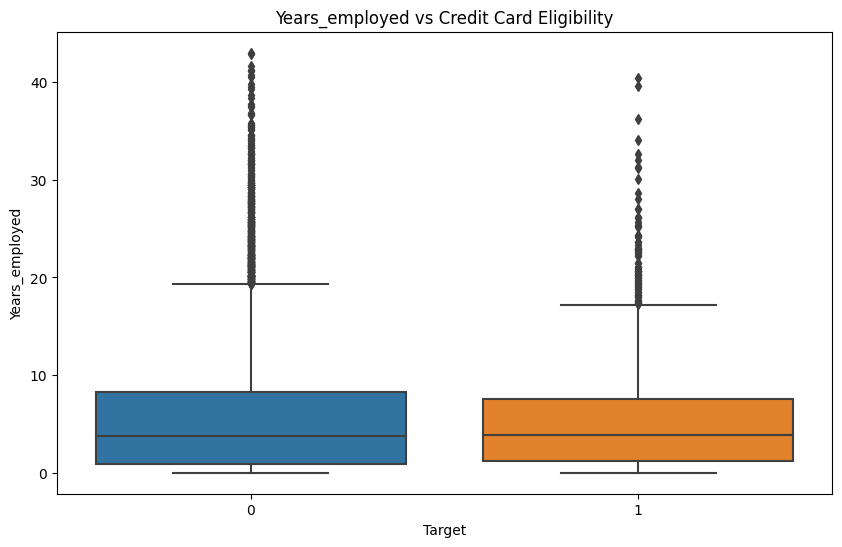

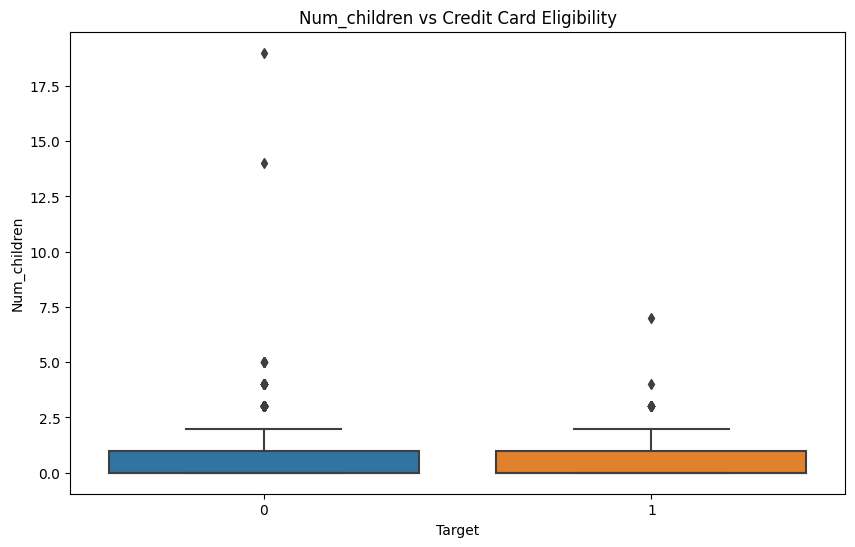

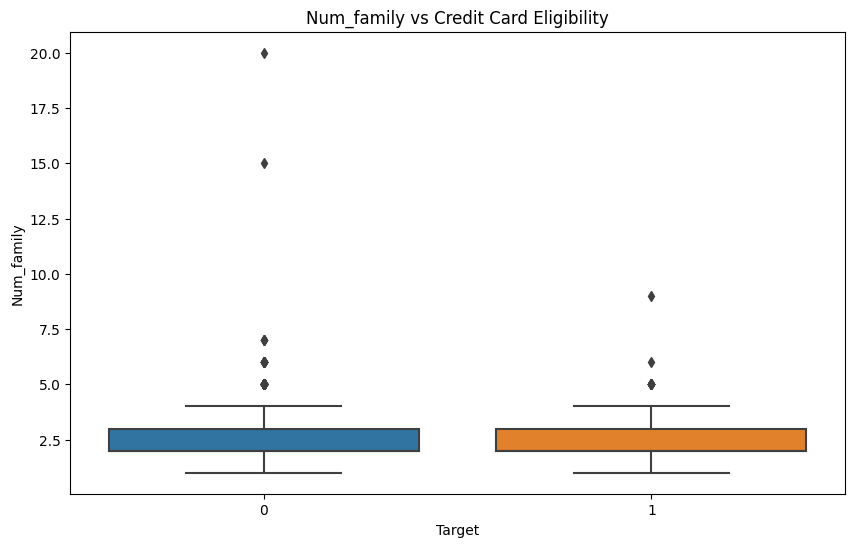

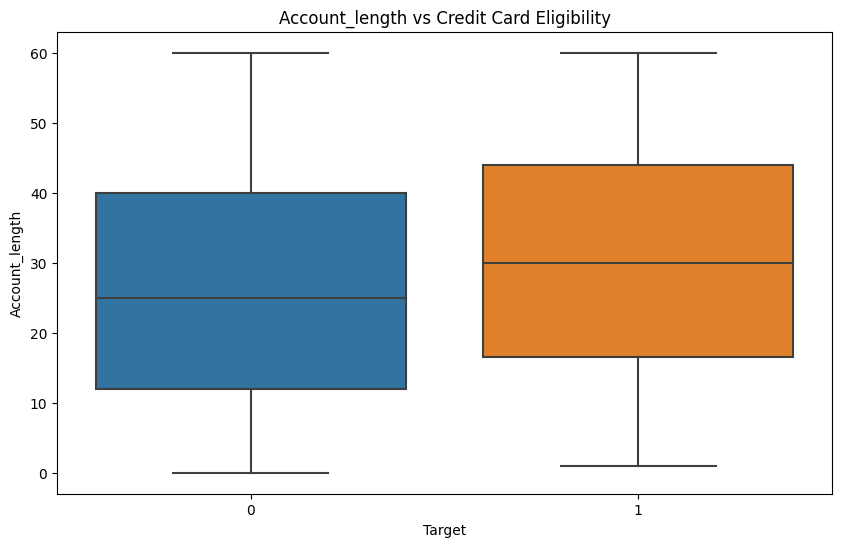

In [13]:
numerical_features = ['Age', 'Total_income', 'Years_employed', 'Num_children', 'Num_family', 'Account_length']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Target', y=feature, data=df)
    plt.title(f'{feature} vs Credit Card Eligibility')
    plt.show()

**Data Preprocessing**

In [42]:
# Convert binary features to numeric
binary_features = ['Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed']
for feature in binary_features:
    df[feature] = df[feature].apply(lambda x: 1 if x == 'Yes' else 0)

In [48]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical features to numeric using Label Encoding
label_encoders = {}
categorical_features = ['Gender', 'Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le



**Define Target Variable (y) and Feature Variables (x)**

In [51]:
x=df1
y=df['Target']

**Train Test Split**

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=2529)

In [55]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7767, 14), (1942, 14), (7767,), (1942,))

**Modeling**

In [57]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=4000)

**Model Evaluation**

In [58]:
reg.fit(x_train,y_train)

LogisticRegression(max_iter=4000)

In [61]:
reg.intercept_

array([-8.92706291e-14])

In [62]:
reg.coef_

array([[-4.00441359e-07,  1.86177897e-12, -7.27935765e-13,
        -4.13502029e-12, -4.65426807e-13, -1.45393153e-12,
         1.29186079e-12, -2.64588796e-12,  5.54322508e-12,
         3.67955102e-12,  4.05800796e-10,  6.98649308e-07,
        -1.70667053e-10, -3.25789506e-11]])

**Prediction**

In [63]:
y_pred = reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.8578784757981462

In [67]:
confusion_matrix(y_test,y_pred)

array([[1666,    0],
       [ 276,    0]])

**Explanation**

This script imports necessary libraries, loads the dataset, handles missing values, encodes categorical and binary features, scales numerical features, defines the target variable and feature variables, splits the data, trains a Logistic Regression model, evaluates the model, and demonstrates how to make predictions on new data.

The model's coefficients and feature importances are interpreted to understand the relationships between the features and the target variable.

This code provides a comprehensive analysis of the dataset, including data preprocessing, visualization, modeling, and evaluation.